# **Analisis Kerentanan Suatu Daerah di Indonesia terhadap Banjir dan Tanah Longsor berdasarkan Total Dampak Fisik, Jumlah Penduduk dan Topografi Wilayah Tahun 2023**

Anggota Kelompok 4

1. Anggi Nur Zavira (1314622009), Statistika UNJ
2. Ananda Keissa Az Zahra (24031554051), Sains Data UNESA


In [1]:
!gdown --folder "https://drive.google.com/drive/folders/1K025UqUeIJb0cKDXDuiEYNBMful1qNKv?usp=sharing"

Retrieving folder contents
Processing file 1dNhNEN2x-l-w-KbS4lT1C7wT3SUYSa8y Data Bencana 2023.csv
Processing file 1yPYv24h1JAPFbPEgQoav1awU8tBmvEuV jumlah_penduduk.xlsx
Processing file 1jkFi4jEZ0GEWDp1swB0HQJNYdWt6EiSf topografi wilayah.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1dNhNEN2x-l-w-KbS4lT1C7wT3SUYSa8y
To: /content/dataset-dw/Data Bencana 2023.csv
100% 1.37M/1.37M [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yPYv24h1JAPFbPEgQoav1awU8tBmvEuV
To: /content/dataset-dw/jumlah_penduduk.xlsx
100% 17.1k/17.1k [00:00<00:00, 3.26MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jkFi4jEZ0GEWDp1swB0HQJNYdWt6EiSf
To: /content/dataset-dw/topografi wilayah.csv
100% 1.58k/1.58k [00:00<00:00, 8.70MB/s]
Download completed


## **Read data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_penduduk = pd.read_excel('/content/dataset-dw/jumlah_penduduk.xlsx',skiprows=2)
df_bencana = pd.read_csv('/content/dataset-dw/Data Bencana 2023.csv', skiprows=1)
df_topografi = pd.read_csv('/content/dataset-dw/topografi wilayah.csv')[:34]

## **Data Cleaning**

Mengatasi NaN

In [4]:
df_penduduk = df_penduduk.fillna(0)

In [5]:
df_bencana = df_bencana.fillna(0)

In [6]:
df_topografi = df_topografi.fillna(0)

Mengambil data penduduk tahun 2023 saja

In [7]:
df_penduduk_2023 = df_penduduk[df_penduduk['tahun'] == 2023]
df_penduduk_2023.to_csv('jumlah_penduduk_2023.csv', index=False)

In [8]:
penduduk_2023 = pd.read_csv('jumlah_penduduk_2023.csv')

Standarisasi data

In [9]:
penduduk_2023.columns = penduduk_2023.columns.str.title()
penduduk_2023 = penduduk_2023.rename(columns={'Prov': 'Provinsi'})
penduduk_2023['Provinsi'] = penduduk_2023['Provinsi'].str.title()
penduduk_2023['Provinsi'] = penduduk_2023['Provinsi'].replace('Dki Jakarta', 'DKI Jakarta')
penduduk_2023['Provinsi'] = penduduk_2023['Provinsi'].replace('P A P U A', 'Papua')
penduduk_2023

,Id,Tahun,Semester,Provinsi,Jumlah_Penduduk,Jumlah_Penduduk_Km2
0,209,2023,1,Aceh,5471625,56834.746
1,210,2023,1,Sumatera Utara,15401904,72460.744
2,211,2023,1,Sumatera Barat,5701545,42119.542
3,212,2023,1,Riau,6794944,89935.896
4,213,2023,1,Jambi,3726004,49026.579
5,214,2023,1,Sumatera Selatan,8813243,86771.684
6,215,2023,1,Bengkulu,2078958,20128.340
7,216,2023,1,Lampung,9001424,33570.264
8,217,2023,1,Kepulauan Bangka Belitung,1502367,16690.129
9,218,2023,1,Kepulauan Riau,2150329,8269.708


In [10]:
df_bencana['Provinsi'] = df_bencana['Provinsi'].str.title()
df_bencana['Provinsi'] = df_bencana['Provinsi'].replace('Dki Jakarta', 'DKI Jakarta')
df_bencana['Provinsi'] = df_bencana['Provinsi'].replace('P A P U A', 'Papua')
df_bencana

,No.,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,3201 101 2023 012 031 1,3201,12/31/2023,BANJIR,Kec. Katapang Ds. Banyusari Kec. Tajurhalang,BOGOR,Jawa Barat,Dokumentasi,●Dipicu oleh hujan dengan intensitas tinggi,0.0,0.0,0.0,0,660.0,1
1,2,1613 101 2023 012 031 1,1613,12/31/2023,BANJIR,Kec. Rupit Ds. Noman Ds. Noman Baru Ds. Batu ...,MUSI RAWAS UTARA,Sumatera Selatan,Dokumentasi,●Hujan dengan intensitas sedang - tinggi yang ...,0.0,0.0,0.0,1,4031.0,1
2,3,3215 101 2023 012 031 1,3215,12/31/2023,BANJIR,Kec. Teluk Jambe Ds. Karang Liar,KARAWANG,Jawa Barat,Dokumentasi,●Hujan deras di wilayah hulu dan beberapa wila...,0.0,0.0,0.0,0,662.0,10
3,4,5205 105 2023 012 031 1,5205,12/31/2023,CUACA EKSTREM,Woja,DOMPU,Nusa Tenggara Barat,Dokumentasi,0,0.0,0.0,0.0,1,0.0,0
4,5,3204 108 2023 012 031 1,3204,12/31/2023,GEMPABUMI,Kec. Arjasari Ds. Pinggirsari Kec. Cicalengka...,BANDUNG,Jawa Barat,Dokumentasi,Gempa Pertama Kekuatan : 4.1 SR Tangg...,0.0,0.0,0.0,3,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,5611,5201 105 2023 01 01 1,5201,1/1/2023,CUACA EKSTREM,"Batulayar, Seteluk",LOMBOK BARAT,Nusa Tenggara Barat,Dokumentasi,0,0.0,0.0,0.0,0,0.0,1
5611,5612,1674 107 2023 01 01 1,1674,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,0,KOTA PRABUMULIH,Sumatera Selatan,Dokumentasi,●Dalam proses penyelidikan,0.0,0.0,0.0,0,0.0,0
5612,5613,6309 107 2023 01 01 1,6309,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,0,TABALONG,Kalimantan Selatan,Dokumentasi,●Masih dalam proses Penyelidikan,0.0,0.0,0.0,0,0.0,0
5613,5614,1602 107 2023 01 01 1,1602,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,0,OGAN KOMERING ILIR,Sumatera Selatan,Dokumentasi,●Dalam proses penyelidikan,0.0,0.0,0.0,0,0.0,0


In [11]:
df_topografi['Provinsi'] = df_topografi['Provinsi'].replace('DI Yogyakarta', 'Daerah Istimewa Yogyakarta')
df_topografi

,Provinsi,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran
0,Aceh,153.0,2011.0,4350.0
1,Sumatera Utara,99.0,3971.0,2062.0
2,Sumatera Barat,5.0,617.0,665.0
3,Riau,1.0,328.0,1547.0
4,Jambi,6.0,450.0,1106.0
5,Sumatera Selatan,20.0,726.0,2546.0
6,Bengkulu,25.0,1137.0,352.0
7,Lampung,1.0,616.0,2037.0
8,Kepulauan Bangka Belitung,0.0,25.0,368.0
9,Kepulauan Riau,2.0,250.0,176.0


## **Integrasi Data**

Subset

In [12]:
subset_penduduk = penduduk_2023[['Provinsi', 'Jumlah_Penduduk', 'Jumlah_Penduduk_Km2']]
subset_penduduk

,Provinsi,Jumlah_Penduduk,Jumlah_Penduduk_Km2
0,Aceh,5471625,56834.746
1,Sumatera Utara,15401904,72460.744
2,Sumatera Barat,5701545,42119.542
3,Riau,6794944,89935.896
4,Jambi,3726004,49026.579
5,Sumatera Selatan,8813243,86771.684
6,Bengkulu,2078958,20128.340
7,Lampung,9001424,33570.264
8,Kepulauan Bangka Belitung,1502367,16690.129
9,Kepulauan Riau,2150329,8269.708


Groupby dan Agregasi

In [13]:
key_cols_impact = ['Provinsi','Kejadian']
impact_cols = ['Meninggal', 'Terluka', 'Rumah Rusak', 'Fasum Rusak', 'Hilang', 'Rumah Terendam']

df_bencana_impact_agg = df_bencana.groupby(key_cols_impact).agg(
    Total_Kejadian=('No.', 'count'),
    Total_Meninggal=('Meninggal', 'sum'),
    Total_Terluka=('Terluka', 'sum'),
    Total_Rumah_Rusak=('Rumah Rusak', 'sum'),
    Total_Fasum_Rusak=('Fasum Rusak', 'sum'),
    Total_Hilang=('Hilang', 'sum'),
    Total_Rumah_Terendam=('Rumah Terendam', 'sum'),
).reset_index()

df_bencana_impact_agg

,Provinsi,Kejadian,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam
0,Aceh,BANJIR,97,5.0,7.0,1354,21,0.0,29244.0
1,Aceh,CUACA EKSTREM,51,2.0,0.0,331,28,0.0,0.0
2,Aceh,GELOMBANG PASANG DAN ABRASI,1,0.0,0.0,0,1,0.0,0.0
3,Aceh,KEBAKARAN HUTAN DAN LAHAN,79,0.0,0.0,0,1,0.0,0.0
4,Aceh,KEKERINGAN,1,0.0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
185,Sumatera Utara,BANJIR,112,10.0,102.0,101,23,11.0,32091.0
186,Sumatera Utara,CUACA EKSTREM,44,0.0,11.0,693,3,0.0,0.0
187,Sumatera Utara,GEMPABUMI,2,0.0,0.0,3,0,0.0,0.0
188,Sumatera Utara,KEBAKARAN HUTAN DAN LAHAN,41,0.0,0.0,0,0,0.0,0.0


Filter

In [14]:
df_banjir = df_bencana_impact_agg[df_bencana_impact_agg['Kejadian'].isin(['BANJIR'])]
df_banjir = df_banjir.drop(columns=['Kejadian'])
df_banjir

,Provinsi,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam
0,Aceh,97,5.0,7.0,1354,21,0.0,29244.0
6,Bali,5,0.0,0.0,6,1,0.0,1682.0
12,Banten,28,0.0,0.0,37,1,0.0,6239.0
17,Bengkulu,11,0.0,0.0,8,10,0.0,2267.0
23,DKI Jakarta,8,0.0,0.0,30,0,0.0,382.0
26,Daerah Istimewa Yogyakarta,6,0.0,0.0,0,1,0.0,119.0
32,Gorontalo,21,0.0,0.0,303,6,0.0,6136.0
36,Jambi,24,5.0,4.0,490,138,0.0,19750.0
41,Jawa Barat,111,4.0,14.0,241,211,0.0,116174.0
47,Jawa Tengah,98,5.0,0.0,87,33,0.0,100172.0


In [15]:
df_tanahlongsor = df_bencana_impact_agg[df_bencana_impact_agg['Kejadian'].isin(['TANAH LONGSOR'])]
df_tanahlongsor = df_tanahlongsor.drop(columns=['Kejadian'])
df_tanahlongsor

,Provinsi,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam
5,Aceh,9,1.0,0.0,4,3,3.0,0.0
11,Bali,23,8.0,11.0,37,9,0.0,0.0
16,Banten,1,0.0,0.0,14,0,0.0,0.0
22,Bengkulu,6,1.0,0.0,1,1,0.0,0.0
25,DKI Jakarta,7,1.0,2.0,11,0,0.0,0.0
31,Daerah Istimewa Yogyakarta,24,0.0,0.0,61,2,0.0,0.0
40,Jambi,4,0.0,0.0,8,0,0.0,0.0
46,Jawa Barat,198,24.0,37.0,844,81,1.0,0.0
53,Jawa Tengah,129,15.0,52.0,265,8,1.0,0.0
59,Jawa Timur,5,2.0,2.0,41,1,0.0,0.0


Merge Banjir

In [16]:
df_merge_banjir = pd.merge(df_banjir, subset_penduduk, on='Provinsi', how='left')
df_merge_banjir

,Provinsi,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam,Jumlah_Penduduk,Jumlah_Penduduk_Km2
0,Aceh,97,5.0,7.0,1354,21,0.0,29244.0,5471625,56834.746
1,Bali,5,0.0,0.0,6,1,0.0,1682.0,4327276,5590.150
2,Banten,28,0.0,0.0,37,1,0.0,6239.0,12381098,9352.767
3,Bengkulu,11,0.0,0.0,8,10,0.0,2267.0,2078958,20128.340
4,DKI Jakarta,8,0.0,0.0,30,0,0.0,382.0,11350328,660.982
5,Daerah Istimewa Yogyakarta,6,0.0,0.0,0,1,0.0,119.0,3710229,3170.645
6,Gorontalo,21,0.0,0.0,303,6,0.0,6136.0,1225808,12025.147
7,Jambi,24,5.0,4.0,490,138,0.0,19750.0,3726004,49026.579
8,Jawa Barat,111,4.0,14.0,241,211,0.0,116174.0,49572392,37044.858
9,Jawa Tengah,98,5.0,0.0,87,33,0.0,100172.0,37949234,34337.489


In [17]:
df_integrated_banjir = pd.merge(df_topografi, df_merge_banjir, on='Provinsi')
df_integrated_banjir

,Provinsi,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam,Jumlah_Penduduk,Jumlah_Penduduk_Km2
0,Aceh,153.0,2011.0,4350.0,97,5.0,7.0,1354,21,0.0,29244.0,5471625,56834.746
1,Sumatera Utara,99.0,3971.0,2062.0,112,10.0,102.0,101,23,11.0,32091.0,15401904,72460.744
2,Sumatera Barat,5.0,617.0,665.0,72,7.0,4593.0,702,78,2.0,21458.0,5701545,42119.542
3,Riau,1.0,328.0,1547.0,79,1.0,0.0,11202,287,0.0,92867.0,6794944,89935.896
4,Jambi,6.0,450.0,1106.0,24,5.0,4.0,490,138,0.0,19750.0,3726004,49026.579
5,Sumatera Selatan,20.0,726.0,2546.0,28,2.0,0.0,87,11,0.0,17377.0,8813243,86771.684
6,Bengkulu,25.0,1137.0,352.0,11,0.0,0.0,8,10,0.0,2267.0,2078958,20128.340
7,Lampung,1.0,616.0,2037.0,19,2.0,0.0,461,4,0.0,3056.0,9001424,33570.264
8,Kepulauan Bangka Belitung,0.0,25.0,368.0,12,0.0,0.0,4,0,0.0,613.0,1502367,16690.129
9,Kepulauan Riau,2.0,250.0,176.0,11,0.0,0.0,32,2,0.0,2848.0,2150329,8269.708


In [18]:
df_integrated_banjir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provinsi                      34 non-null     object 
 1   Desa/Kelurahan Lembah         34 non-null     float64
 2   Desa/Kelurahan Lereng/Puncak  34 non-null     float64
 3   Desa/Kelurahan Dataran        34 non-null     float64
 4   Total_Kejadian                34 non-null     int64  
 5   Total_Meninggal               34 non-null     float64
 6   Total_Terluka                 34 non-null     float64
 7   Total_Rumah_Rusak             34 non-null     int64  
 8   Total_Fasum_Rusak             34 non-null     int64  
 9   Total_Hilang                  34 non-null     float64
 10  Total_Rumah_Terendam          34 non-null     float64
 11  Jumlah_Penduduk               34 non-null     int64  
 12  Jumlah_Penduduk_Km2           34 non-null     float64
dtypes: floa

Merge Tanah Longsor

In [19]:
df_merge_longsor = pd.merge(df_tanahlongsor, subset_penduduk, on='Provinsi', how='left')
df_merge_longsor

,Provinsi,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam,Jumlah_Penduduk,Jumlah_Penduduk_Km2
0,Aceh,9,1.0,0.0,4,3,3.0,0.0,5471625,56834.746
1,Bali,23,8.0,11.0,37,9,0.0,0.0,4327276,5590.150
2,Banten,1,0.0,0.0,14,0,0.0,0.0,12381098,9352.767
3,Bengkulu,6,1.0,0.0,1,1,0.0,0.0,2078958,20128.340
4,DKI Jakarta,7,1.0,2.0,11,0,0.0,0.0,11350328,660.982
5,Daerah Istimewa Yogyakarta,24,0.0,0.0,61,2,0.0,0.0,3710229,3170.645
6,Jambi,4,0.0,0.0,8,0,0.0,0.0,3726004,49026.579
7,Jawa Barat,198,24.0,37.0,844,81,1.0,0.0,49572392,37044.858
8,Jawa Tengah,129,15.0,52.0,265,8,1.0,0.0,37949234,34337.489
9,Jawa Timur,5,2.0,2.0,41,1,0.0,0.0,41471061,48036.840


In [20]:
df_integrated_longsor = pd.merge(df_topografi, df_merge_longsor, on='Provinsi')
df_integrated_longsor.drop(columns=['Total_Rumah_Terendam'], inplace=True)
df_integrated_longsor

,Provinsi,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Jumlah_Penduduk,Jumlah_Penduduk_Km2
0,Aceh,153.0,2011.0,4350.0,9,1.0,0.0,4,3,3.0,5471625,56834.746
1,Sumatera Utara,99.0,3971.0,2062.0,19,6.0,25.0,16,2,2.0,15401904,72460.744
2,Sumatera Barat,5.0,617.0,665.0,14,3.0,615.0,248,7,0.0,5701545,42119.542
3,Riau,1.0,328.0,1547.0,3,0.0,0.0,21,1,0.0,6794944,89935.896
4,Jambi,6.0,450.0,1106.0,4,0.0,0.0,8,0,0.0,3726004,49026.579
5,Sumatera Selatan,20.0,726.0,2546.0,3,0.0,0.0,9,0,0.0,8813243,86771.684
6,Bengkulu,25.0,1137.0,352.0,6,1.0,0.0,1,1,0.0,2078958,20128.340
7,Lampung,1.0,616.0,2037.0,3,3.0,0.0,4,0,6.0,9001424,33570.264
8,Kepulauan Bangka Belitung,0.0,25.0,368.0,1,1.0,0.0,0,0,0.0,1502367,16690.129
9,Kepulauan Riau,2.0,250.0,176.0,2,44.0,4.0,100,0,4.0,2150329,8269.708


In [21]:
float_cols_to_int = [
    'Desa/Kelurahan Lembah',
    'Desa/Kelurahan Lereng/Puncak',
    'Desa/Kelurahan Dataran',
    'Total_Meninggal',
    'Total_Terluka',
    'Total_Hilang',
]

for col in float_cols_to_int:
    df_integrated_longsor[col] = df_integrated_longsor[col].astype(int)

In [22]:
float_cols_to_int = [
    'Desa/Kelurahan Lembah',
    'Desa/Kelurahan Lereng/Puncak',
    'Desa/Kelurahan Dataran',
    'Total_Meninggal',
    'Total_Terluka',
    'Total_Hilang',
    'Total_Rumah_Terendam'
]
for col in float_cols_to_int:
  df_integrated_banjir[col] = df_integrated_banjir[col].astype(int)

In [23]:
df_integrated_banjir.to_csv('df_integrated_banjir.csv', index=False)
df_integrated_longsor.to_csv('df_integrated_longsor.csv', index=False)

## **Eksplorasi Data Analisis (EDA)**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

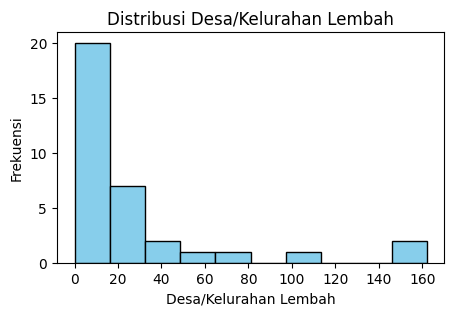

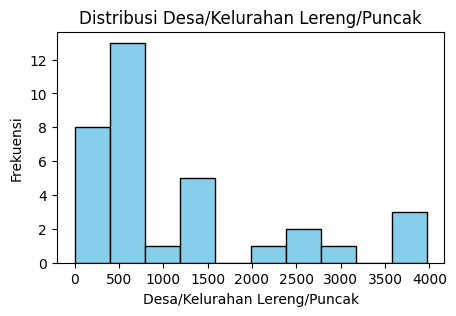

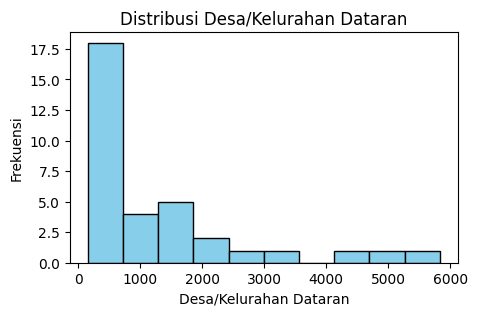

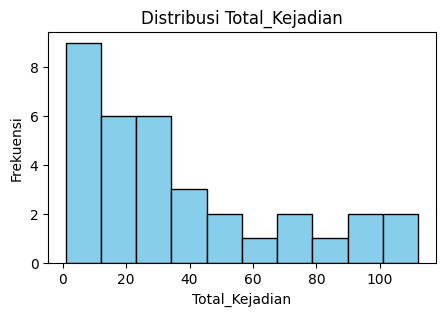

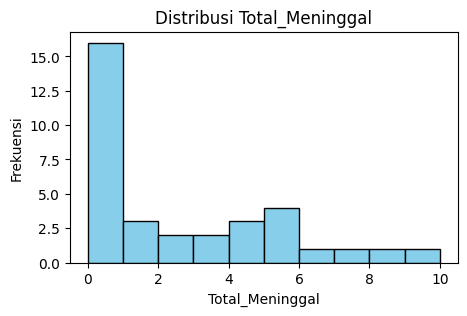

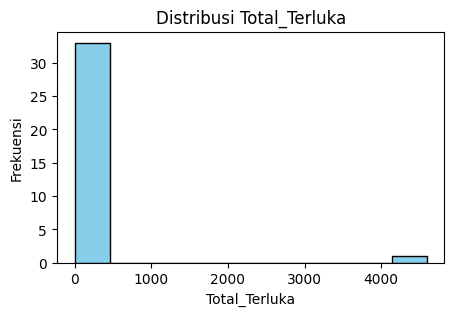

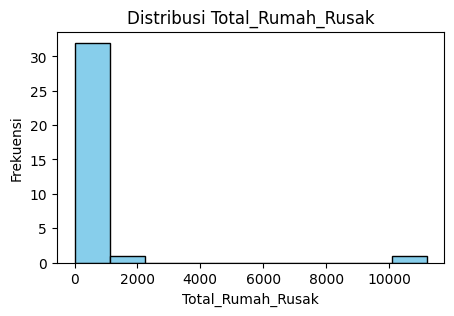

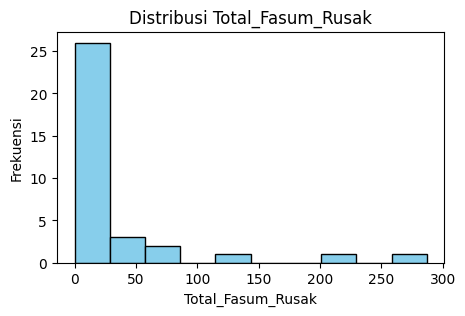

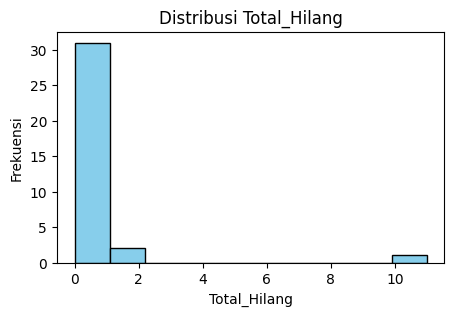

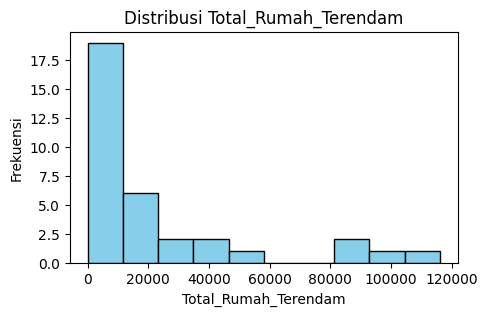

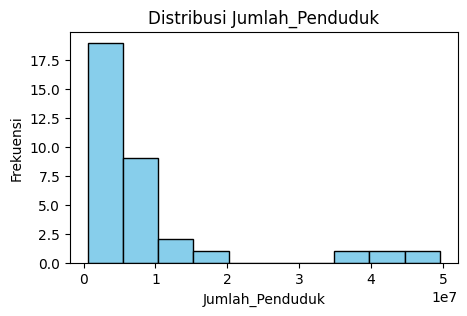

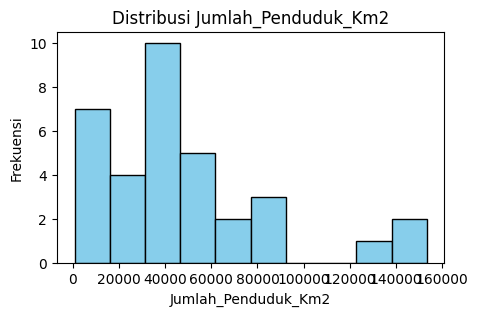

In [25]:
numerical_cols = df_integrated_banjir.select_dtypes(include=['int','float']).columns

for col in numerical_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df_integrated_banjir[col], color='#87CEEB', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

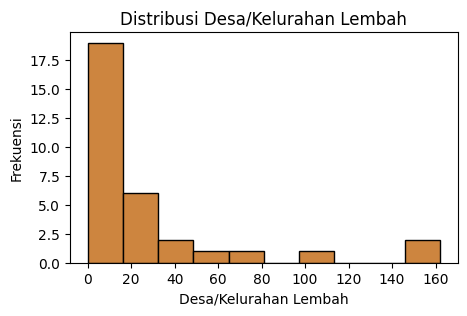

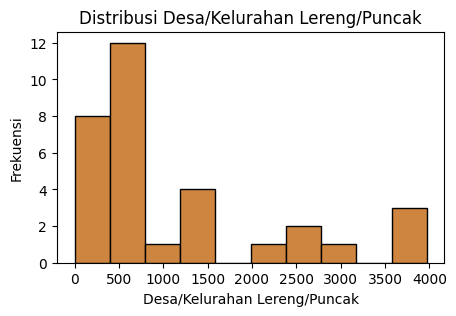

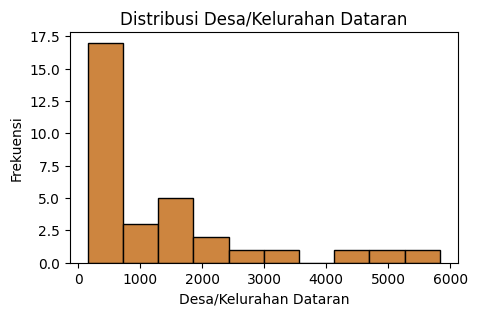

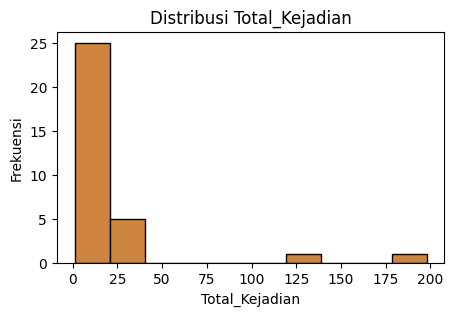

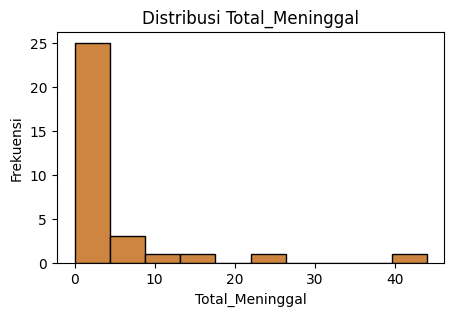

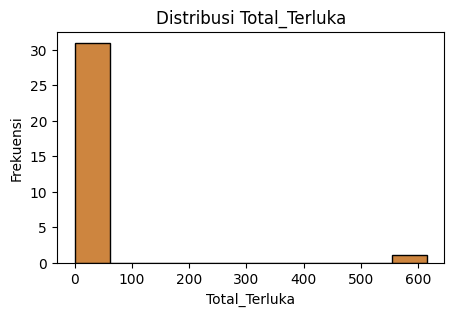

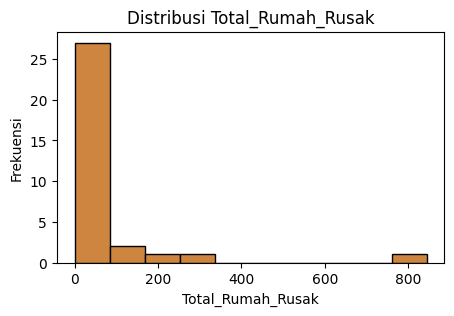

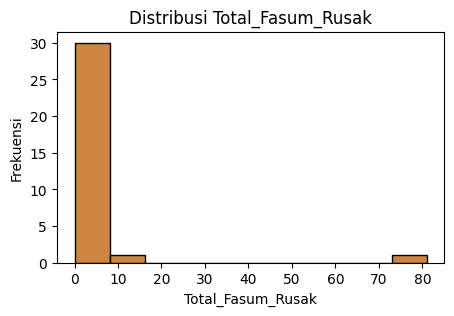

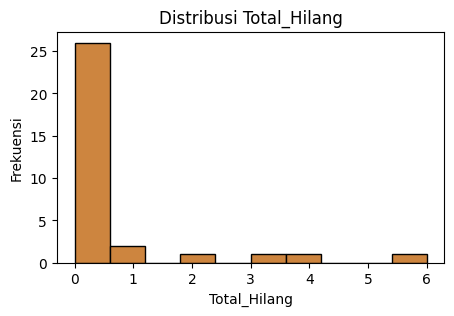

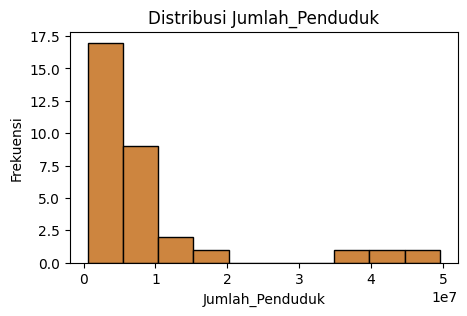

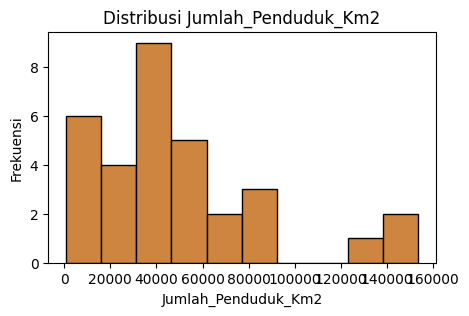

In [26]:
numerical_cols = df_integrated_longsor.select_dtypes(include=['int','float']).columns

for col in numerical_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df_integrated_longsor[col], color='peru', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

In [27]:
print(df_integrated_banjir.columns)

Index(['Provinsi', 'Desa/Kelurahan Lembah', 'Desa/Kelurahan Lereng/Puncak',
       'Desa/Kelurahan Dataran', 'Total_Kejadian', 'Total_Meninggal',
       'Total_Terluka', 'Total_Rumah_Rusak', 'Total_Fasum_Rusak',
       'Total_Hilang', 'Total_Rumah_Terendam', 'Jumlah_Penduduk',
       'Jumlah_Penduduk_Km2'],
      dtype='object')


In [28]:
print(df_integrated_longsor.columns)

Index(['Provinsi', 'Desa/Kelurahan Lembah', 'Desa/Kelurahan Lereng/Puncak',
       'Desa/Kelurahan Dataran', 'Total_Kejadian', 'Total_Meninggal',
       'Total_Terluka', 'Total_Rumah_Rusak', 'Total_Fasum_Rusak',
       'Total_Hilang', 'Jumlah_Penduduk', 'Jumlah_Penduduk_Km2'],
      dtype='object')


In [29]:
numerical_df_integratedb = df_integrated_banjir.select_dtypes(include=np.number)
numerical_df_integratedb.corr()

,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam,Jumlah_Penduduk,Jumlah_Penduduk_Km2
Desa/Kelurahan Lembah,1.000000,0.793471,0.572661,0.337105,0.344059,-0.081648,-0.047102,-0.045527,0.285224,0.093083,0.256285,0.134533
Desa/Kelurahan Lereng/Puncak,0.793471,1.000000,0.585501,0.458774,0.572599,-0.073389,-0.102806,0.036005,0.472354,0.267495,0.503303,0.173505
Desa/Kelurahan Dataran,0.572661,0.585501,1.000000,0.591497,0.449046,-0.077692,0.076160,0.218608,0.062368,0.588587,0.787826,0.142645
Total_Kejadian,0.337105,0.458774,0.591497,1.000000,0.601337,0.202617,0.286643,0.536907,0.428159,0.716563,0.568269,0.224994
Total_Meninggal,0.344059,0.572599,0.449046,0.601337,1.000000,0.313054,0.003771,0.207414,0.611129,0.249354,0.412845,0.080984
Total_Terluka,-0.081648,-0.073389,-0.077692,0.202617,0.313054,1.000000,0.014211,0.129342,0.161269,0.000492,-0.032838,-0.019014
Total_Rumah_Rusak,-0.047102,-0.102806,0.076160,0.286643,0.003771,0.014211,1.000000,0.736168,-0.044834,0.393576,-0.015420,0.177862
Total_Fasum_Rusak,-0.045527,0.036005,0.218608,0.536907,0.207414,0.129342,0.736168,1.000000,-0.019567,0.604525,0.354591,0.116799
Total_Hilang,0.285224,0.472354,0.062368,0.428159,0.611129,0.161269,-0.044834,-0.019567,1.000000,0.044898,0.091695,0.145513
Total_Rumah_Terendam,0.093083,0.267495,0.588587,0.716563,0.249354,0.000492,0.393576,0.604525,0.044898,1.000000,0.648592,0.299211


In [30]:
numerical_df_integratedl = df_integrated_longsor.select_dtypes(include=np.number)
numerical_df_integratedl.corr()

,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Jumlah_Penduduk,Jumlah_Penduduk_Km2
Desa/Kelurahan Lembah,1.000000,0.792920,0.569355,0.112095,-0.003378,-0.065392,0.053305,0.077057,0.186208,0.250299,0.123212
Desa/Kelurahan Lereng/Puncak,0.792920,1.000000,0.583004,0.374007,0.119363,-0.024876,0.262919,0.228102,0.105736,0.502793,0.160827
Desa/Kelurahan Dataran,0.569355,0.583004,1.000000,0.444624,0.106317,-0.032113,0.327969,0.306076,0.253468,0.784479,0.121606
Total_Kejadian,0.112095,0.374007,0.444624,1.000000,0.440398,0.068053,0.900682,0.873813,0.056517,0.766747,-0.106707
Total_Meninggal,-0.003378,0.119363,0.106317,0.440398,1.000000,0.030749,0.519307,0.422469,0.473813,0.332147,-0.254664
Total_Terluka,-0.065392,-0.024876,-0.032113,0.068053,0.030749,1.000000,0.286590,0.100883,-0.054193,0.036690,-0.044344
Total_Rumah_Rusak,0.053305,0.262919,0.327969,0.900682,0.519307,0.286590,1.000000,0.941665,0.073347,0.700560,-0.148282
Total_Fasum_Rusak,0.077057,0.228102,0.306076,0.873813,0.422469,0.100883,0.941665,1.000000,0.056235,0.662714,-0.079976
Total_Hilang,0.186208,0.105736,0.253468,0.056517,0.473813,-0.054193,0.073347,0.056235,1.000000,0.105343,-0.129425
Jumlah_Penduduk,0.250299,0.502793,0.784479,0.766747,0.332147,0.036690,0.700560,0.662714,0.105343,1.000000,-0.082622


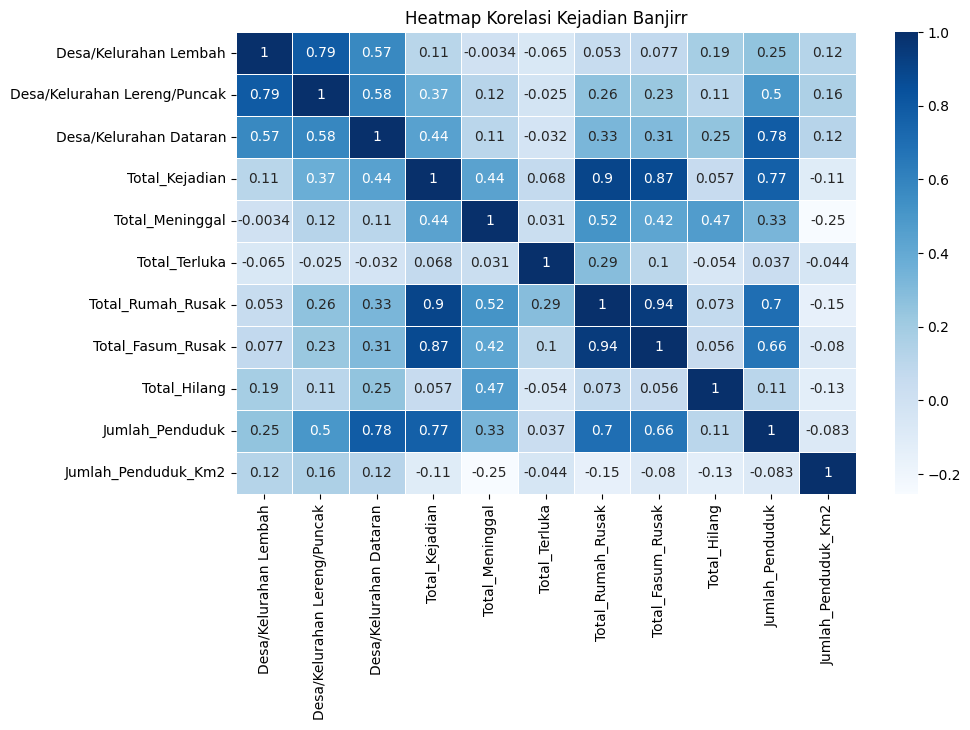

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(
    numerical_df_integratedl.corr(),
    annot=True,
    linewidths=0.5,
    cmap="Blues"
)
plt.title("Heatmap Korelasi Kejadian Banjirr")
plt.show()


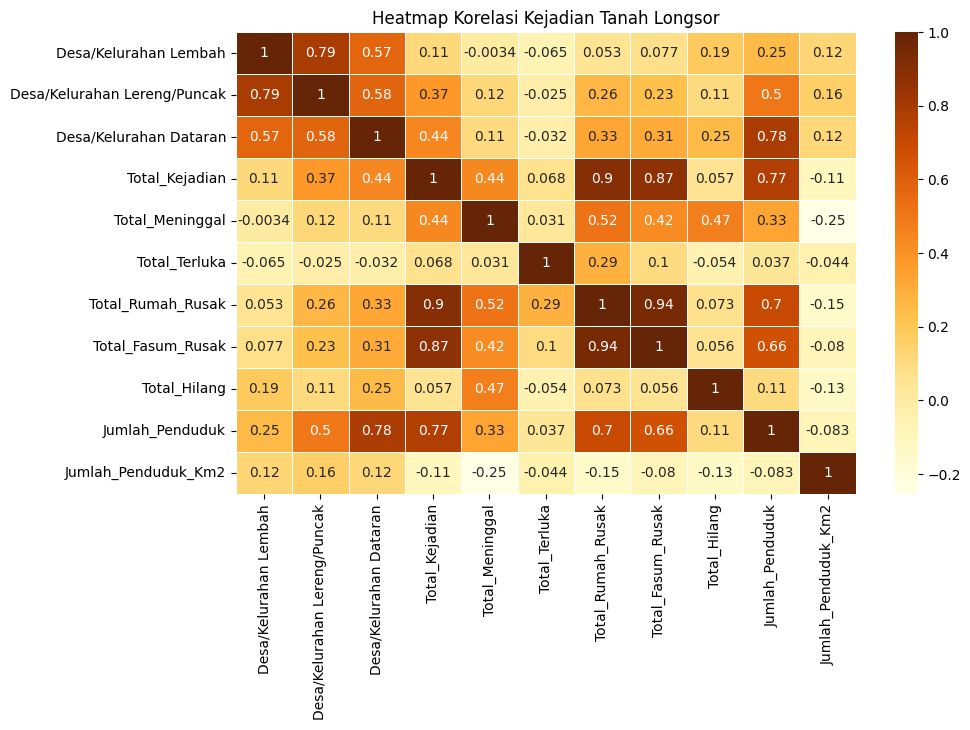

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(
    numerical_df_integratedl.corr(),
    annot=True,
    linewidths=0.5,
    cmap="YlOrBr"
)
plt.title("Heatmap Korelasi Kejadian Tanah Longsor")
plt.show()

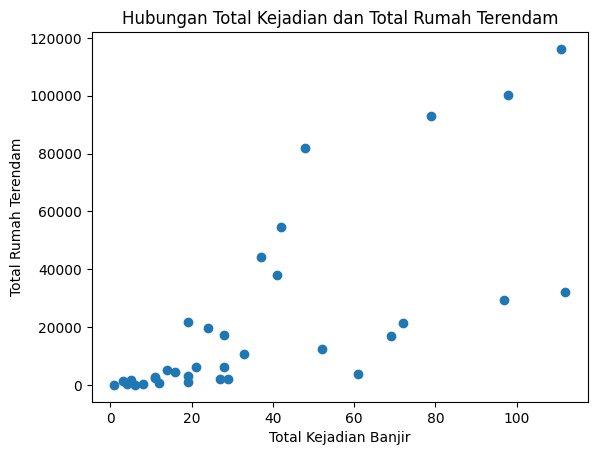

In [33]:
plt.scatter(numerical_df_integratedb['Total_Kejadian'],
            numerical_df_integratedb['Total_Rumah_Terendam'])

plt.xlabel('Total Kejadian Banjir')
plt.ylabel('Total Rumah Terendam')
plt.title('Hubungan Total Kejadian dan Total Rumah Terendam')

plt.show()


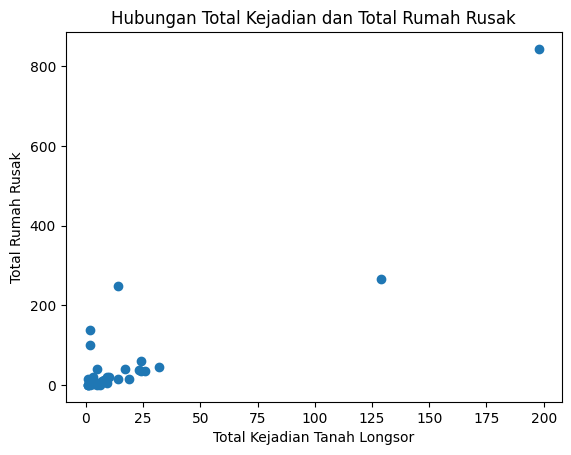

In [34]:
plt.scatter(numerical_df_integratedl['Total_Kejadian'],
            numerical_df_integratedl['Total_Rumah_Rusak'])

plt.xlabel('Total Kejadian Tanah Longsor')
plt.ylabel('Total Rumah Rusak')
plt.title('Hubungan Total Kejadian dan Total Rumah Rusak')

plt.show()


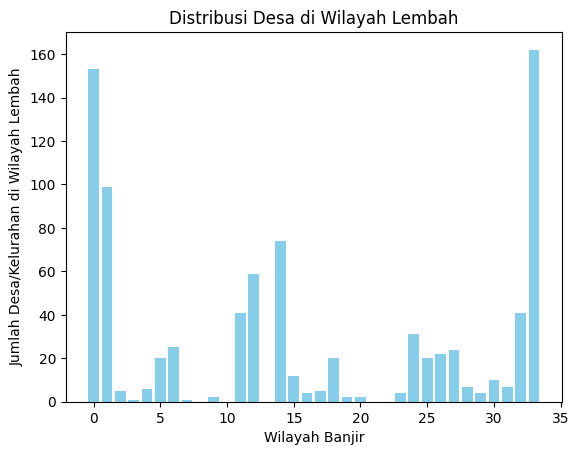

In [35]:
numerical_df_integratedb = df_integrated_banjir.select_dtypes(include=np.number)

plt.bar(
    numerical_df_integratedb.index,
    numerical_df_integratedb['Desa/Kelurahan Lembah'],
    color='skyblue'
)
plt.xlabel('Wilayah Banjir')
plt.ylabel('Jumlah Desa/Kelurahan di Wilayah Lembah')
plt.title('Distribusi Desa di Wilayah Lembah')
plt.show()

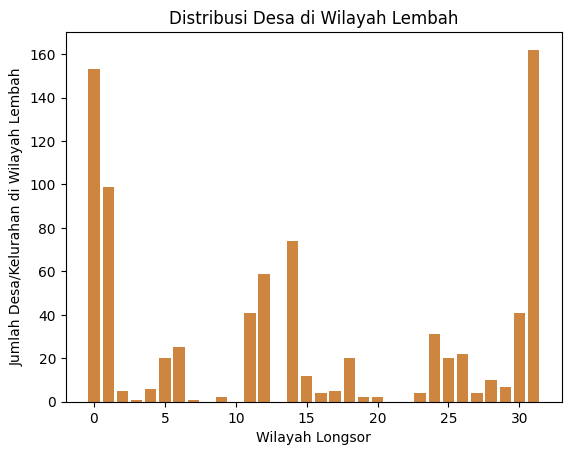

In [36]:
numerical_df_integratedb = df_integrated_longsor.select_dtypes(include=np.number)

plt.bar(
    numerical_df_integratedb.index,
    numerical_df_integratedb['Desa/Kelurahan Lembah'],
    color='peru'
)
plt.xlabel('Wilayah Longsor')
plt.ylabel('Jumlah Desa/Kelurahan di Wilayah Lembah')
plt.title('Distribusi Desa di Wilayah Lembah')
plt.show()

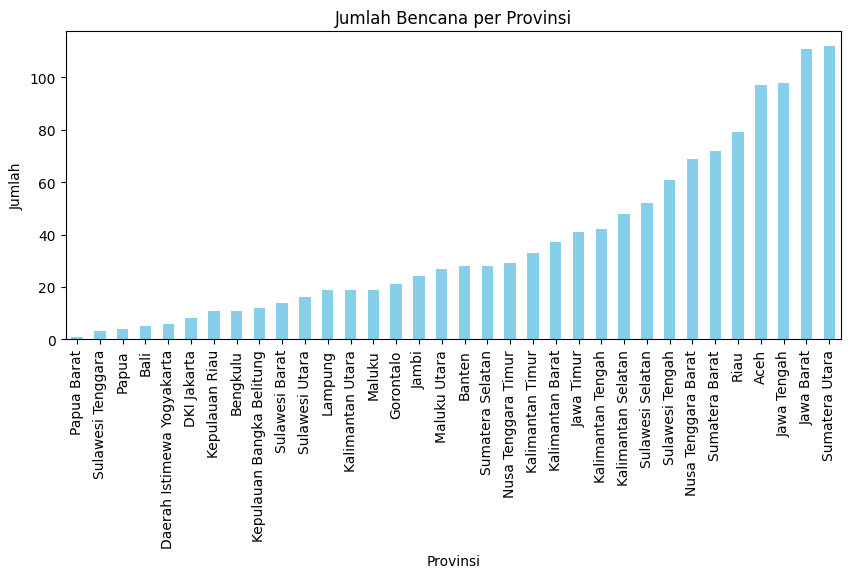

In [37]:
df_integrated_banjir.groupby('Provinsi')['Total_Kejadian'] \
    .sum() \
    .sort_values() \
    .plot(kind='bar', figsize=(10,4), color='skyblue')

plt.title('Jumlah Bencana per Provinsi')
plt.ylabel('Jumlah')
plt.show()

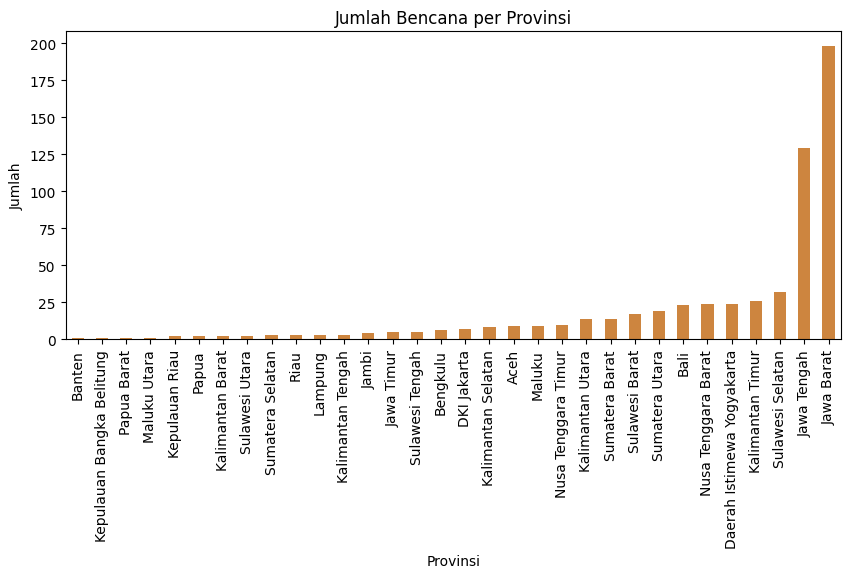

In [38]:
df_integrated_longsor.groupby('Provinsi')['Total_Kejadian'] \
    .sum() \
    .sort_values() \
    .plot(kind='bar', figsize=(10,4), color='peru')

plt.title('Jumlah Bencana per Provinsi')
plt.ylabel('Jumlah')
plt.show()

In [39]:
def kategori_kerentanan(x):
    if x < 50:
        return "Rendah"
    elif x < 200:
        return "Sedang"
    else:
        return "Tinggi"

df_integrated_banjir['jumlah_korban'] = df_integrated_banjir['Total_Meninggal'] + df_integrated_banjir['Total_Terluka'] + df_integrated_banjir['Total_Hilang']
df_integrated_banjir['kategori_kerentanan'] = df_integrated_banjir['jumlah_korban'].apply(kategori_kerentanan)
df_integrated_banjir['kategori_kerentanan'].value_counts()

,count
kategori_kerentanan,
Rendah,32
Sedang,1
Tinggi,1


In [40]:
def kategori_kerentanan(x):
    if x < 50:
        return "Rendah"
    elif x < 200:
        return "Sedang"
    else:
        return "Tinggi"

df_integrated_longsor['jumlah_korban'] = df_integrated_longsor['Total_Meninggal'] + df_integrated_longsor['Total_Terluka'] + df_integrated_longsor['Total_Hilang']
df_integrated_longsor['kategori_kerentanan'] = df_integrated_longsor['jumlah_korban'].apply(kategori_kerentanan)
df_integrated_longsor['kategori_kerentanan'].value_counts()

,count
kategori_kerentanan,
Rendah,28
Sedang,3
Tinggi,1


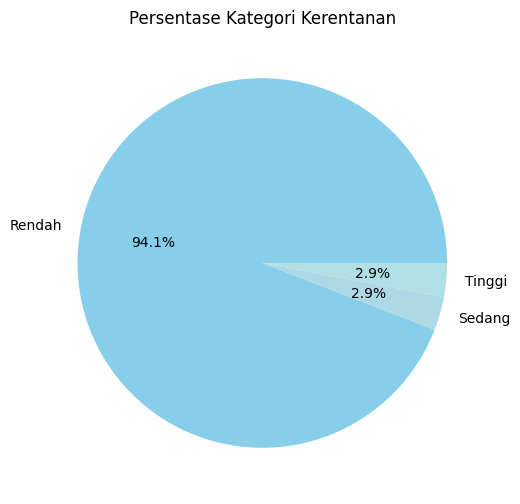

In [41]:
df_integrated_banjir['kategori_kerentanan'] \
    .value_counts() \
    .plot(
        kind='pie',
        autopct='%1.1f%%',
        figsize=(6,6),
        colors=['#87CEEB', '#ADD8E6', '#B0E0E6']
    )

plt.title('Persentase Kategori Kerentanan')
plt.ylabel('')
plt.show()

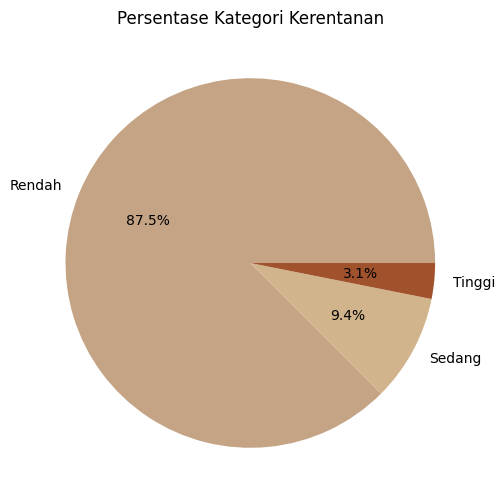

In [42]:
df_integrated_longsor['kategori_kerentanan'] \
    .value_counts() \
    .plot(
        kind='pie',
        autopct='%1.1f%%',
        figsize=(6,6),
        colors=['#C4A484', '#D2B48C', '#A0522D']
    )

plt.title('Persentase Kategori Kerentanan')
plt.ylabel('')
plt.show()